In [1]:
from matplotlib import pylab as plt
import numpy as np

In [2]:
import os

```python 
data_folder = your path to the folder containing the data
```
Insert your path here

### Load image file and convert it to array

In [4]:
input_file_name = os.path.join(data_folder,'test 2_data.raw' )

In [5]:
im=np.fromfile(input_file_name,dtype='uint16')

In [6]:
im.shape

(54080400,)

In [7]:
pixPerFrame=(520*520)+2

In [8]:
nFrames=int(im.size/pixPerFrame)

In [9]:
im=im.reshape([nFrames, pixPerFrame])

In [10]:
im.shape

(200, 270402)

In [11]:
print(im)

[[   1    0 2475 ...  920  943  842]
 [   2    0  677 ...  913  935  844]
 [   3    0  682 ...  917  923  845]
 ...
 [ 198    0  690 ...  932  936  845]
 [ 199    0  690 ...  923  952  852]
 [ 200    0  684 ...  930  948  842]]


In [12]:
im.shape

(200, 270402)

In [13]:
im = im[1:,2:]

In [14]:
im.shape

(199, 270400)

#### reshape array to shape: (n_frame, 520, 520) :
- each component on axis 0 is a 520x520 array, corresponding to a single frame

In [15]:
im=im.reshape([nFrames-1, 520, 520])

#### shape of the dataset: 199 frames, with size 520x520

In [16]:
im.shape

(199, 520, 520)

#### take the first image (first component of the dataset array)

In [17]:
first_im = im[0,:,:]

#### check the shape of first image and plot

In [18]:
print(first_im.shape)

(520, 520)


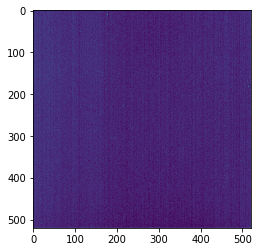

In [19]:
plt.imshow(first_im)

#### Look at standard deviation across all frames (e.g. noise)

In [20]:
std_all_frames = im.std(axis=0)

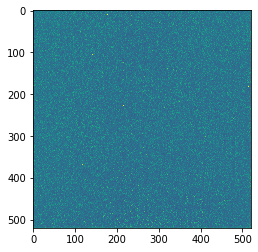

In [21]:
plt.imshow(std_all_frames)
plt.clim(0,15)

In [22]:
std_all_frames.shape

(520, 520)

you can average the signal across all frames in the **same** way to get a new 520x520 image with the **mean** of every pixel

```python 
im.mean(axis=0)
```


#### Average the pedistal (per frame) and plot it as a function of the frame number

- define empty lists for mean and std
- loop over number of frames
    - calculate mean and std for each frame and append values to corresponding list
- plot mean as a function of frame number (e.g. range(199))

In [23]:
n_frames_new = nFrames-1

In [24]:
means = []
stds = []
for i in range(n_frames_new):
    frame = im[i,:,:]
    means.append(frame.mean())
    stds.append(frame.std())

look at the means per frame

In [57]:
means

[624.0254659763314,
 624.3552107988165,
 624.2923298816568,
 624.3256878698224,
 624.4414349112426,
 624.4081102071005,
 624.5843823964497,
 624.5988535502959,
 624.770551035503,
 624.8293639053254,
 624.9940643491125,
 625.2058394970414,
 625.3063313609467,
 625.4818676035503,
 625.6720599112426,
 625.7905436390532,
 625.8756434911243,
 625.9674149408283,
 626.1157914201184,
 626.1992862426035,
 626.2534467455621,
 626.3698594674556,
 626.5596560650888,
 626.6437315088757,
 626.6905732248521,
 626.8096634615384,
 626.8644600591716,
 626.8864275147929,
 626.9834911242604,
 627.189049556213,
 627.2937832840237,
 627.5621560650887,
 627.542899408284,
 627.5909171597633,
 627.7003069526627,
 627.6801738165681,
 627.7874260355029,
 627.7439312130177,
 627.8173853550296,
 627.8379031065089,
 627.8856397928994,
 627.9050628698225,
 627.9470710059171,
 627.8910909763314,
 627.9097928994083,
 628.0381545857988,
 627.9553846153846,
 628.1477958579882,
 628.3466863905326,
 628.4286168639053,
 62

plot mean signal vs frame number

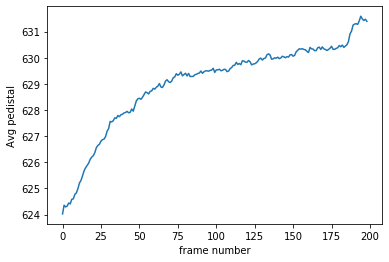

In [25]:
plt.plot(range(n_frames_new), means)
plt.xlabel("frame number")
plt.ylabel("Avg pedistal")
plt.show()

you can do the same with std

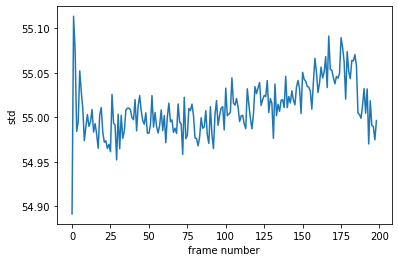

In [26]:
_= plt.plot(range(n_frames_new), stds)
plt.xlabel("frame number")
plt.ylabel("std")
plt.show()

In [27]:
input_file_2 = os.path.join(data_folder,'2.27V_data.raw' )

In [31]:
pixPerFrame=(520*520)+2 #2 extra pixels are saved in with meta data, the first one is frame number starting 0
nFrames=int(im.size/pixPerFrame) #work out number of frames in dataset, recast as int for reshape function
print("nFrames",nFrames)
im2=im2.reshape([nFrames,pixPerFrame]) #reshape to a list of frames 
print(im2)

nFrames 201
[[   1    0 2470 ...  914  931  841]
 [   2    0  664 ...  913  939  846]
 [   3    0  674 ...  921  940  843]
 ...
 [ 199    0  674 ...  936  942  852]
 [ 200    0  679 ...  933  934  856]
 [ 201    0  674 ...  928  941  859]]
